## **<font color='purple'>Detecção de anomalias nos acessos ao blog Cinetour-Viagem de Cinema usando PyCaret</font>**

## **<font color='orange'>Part 1 - Libraries, Dataset & Data Understanding</font>**

### **<font color='orangered'>Libraries and dataset</font>**

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
from pycaret.anomaly import *

In [2]:
# Dataset
df = pd.read_csv('VC_ST_dia.csv', sep=';')
df.head()

,date,access,day,month,year,week_day
0,01/06/2022,74,1,6,2022,Wed
1,02/06/2022,129,2,6,2022,Thu
2,03/06/2022,189,3,6,2022,Fri
3,04/06/2022,196,4,6,2022,Sat
4,05/06/2022,74,5,6,2022,Sun


- Period: from 01/06/22 to 30/04/23

### **<font color='orangered'>Data exploration & statistics</font>**

In [3]:
# Statistics
df['access'].describe()

count     334.000000
mean      176.413174
std       107.634837
min        49.000000
25%       118.250000
50%       160.500000
75%       213.000000
max      1543.000000
Name: access, dtype: float64

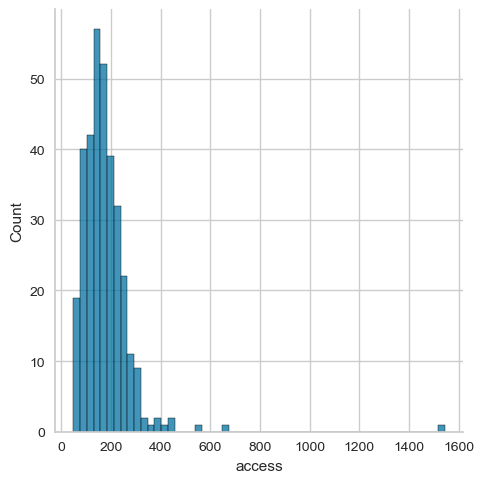

In [4]:
# Data distribution (mean = 176.41 & Median = 160.50)
sns.displot(x=df['access'])

<AxesSubplot:xlabel='access'>

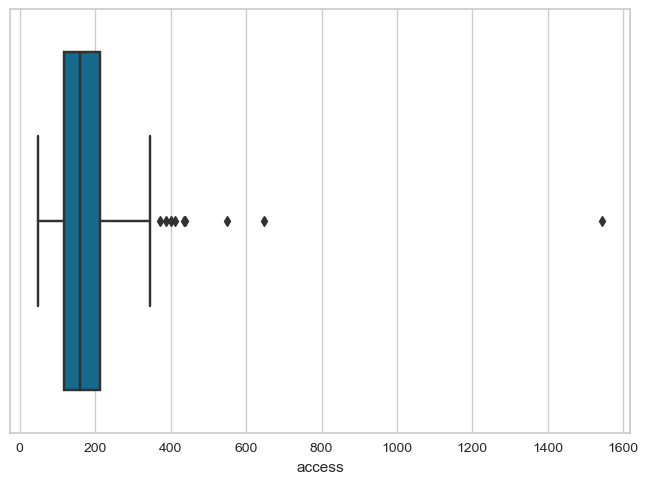

In [5]:
# Boxplot of total data
sns.boxplot(x=df['access'])

<AxesSubplot:xlabel='day', ylabel='access'>

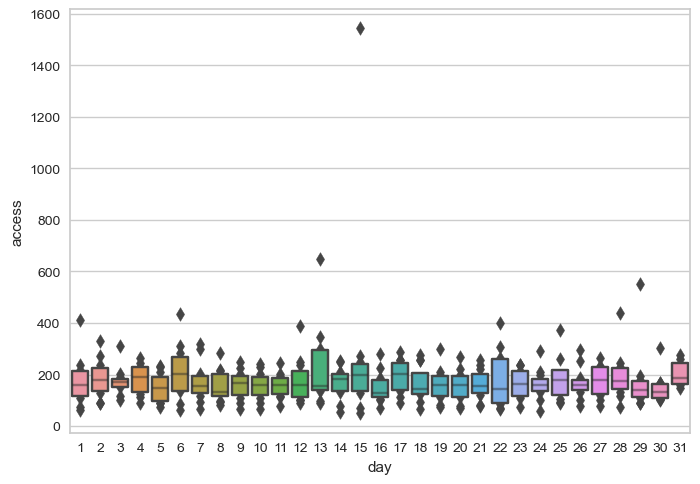

In [6]:
# Boxenplot per day
sns.boxenplot(y=df['access'], x=df['day'])

<AxesSubplot:xlabel='week_day', ylabel='access'>

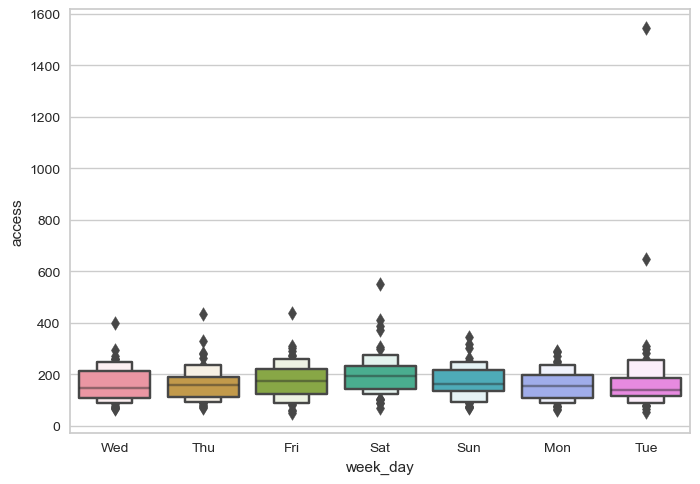

In [7]:
# Boxenplot per week day
sns.boxenplot(y=df['access'], x=df['week_day'])

<AxesSubplot:xlabel='month', ylabel='access'>

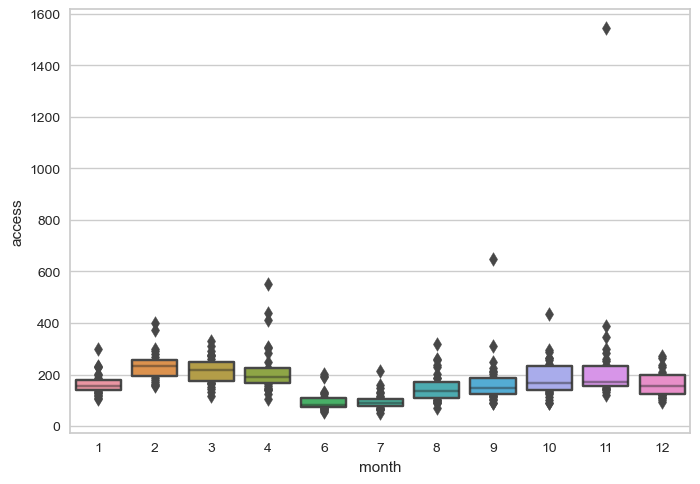

In [8]:
# Boxenplot per month
sns.boxenplot(y=df['access'], x=df['month'])

<AxesSubplot:xlabel='year', ylabel='access'>

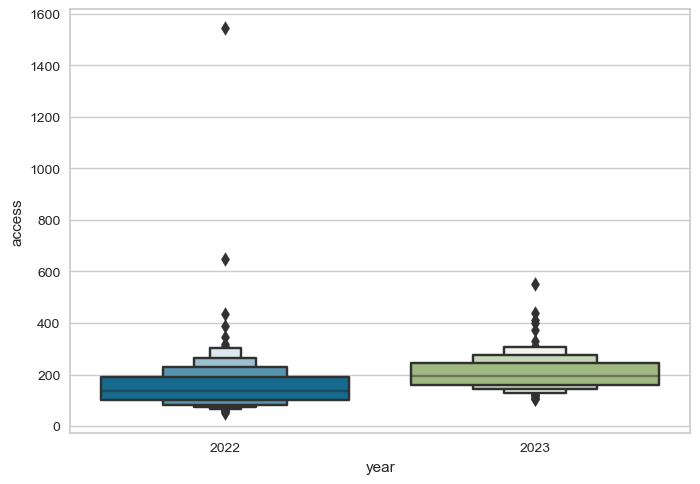

In [9]:
# Boxenplot per year
sns.boxenplot(y=df['access'], x=df['year'])

## **<font color='orange'>Part 2 - Anomaly Detection Models & Visualizations</font>**

In [10]:
# Data split
train = df.sample(frac=0.85, random_state=300)
test = df.drop(train.index)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train: ' + str(train.shape))
print('Test: ' + str(test.shape))

Train: (284, 6)
Test: (50, 6)


In [11]:
# Preprocessing
anom_exp = setup(train, normalize = True, session_id = 1, numeric_features= ['access', 'day'])

,Description,Value
0,Session id,1
1,Original data shape,"(284, 6)"
2,Transformed data shape,"(284, 295)"
3,Numeric features,2
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [12]:
# Models by PyCaret
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


**The models used here are:**
- Histogram-based Outlier Detection	
- Isolation Forest
- K-Nearest Neighbors Detector and
- Local Outlier Factor

### **<font color='orangered'>Histogram Model to Detect Outliers</font>**

In [13]:
# Creating the model
hist = create_model('histogram')
print(hist)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5)


In [14]:
# Assigning this model
hist_results = assign_model(hist)
anomalies_hist_access = hist_results.sort_values(["access"], ascending = (False))
anomalies_hist_access.head()

,date,access,day,month,year,week_day,Anomaly,Anomaly_Score
9,15/11/2022,1543,15,11,2022,Tue,1,149.065915
127,13/09/2022,648,13,9,2022,Tue,1,150.269601
25,29/04/2023,550,29,4,2023,Sat,1,150.403312
69,28/04/2023,437,28,4,2023,Fri,1,150.697164
102,06/10/2022,436,6,10,2022,Thu,1,149.838676


In [15]:
hist_results.rename(columns = {"Anomaly" : "Hist_Class", "Anomaly_Score" : "Hist_Score"}, inplace = True)
hist_results.head()

,date,access,day,month,year,week_day,Hist_Class,Hist_Score
0,24/12/2022,200,24,12,2022,Sat,0,146.433469
1,30/08/2022,100,30,8,2022,Tue,0,147.299231
2,11/01/2023,115,11,1,2023,Wed,0,147.179860
3,06/06/2022,61,6,6,2022,Mon,0,147.526169
4,12/03/2023,248,12,3,2023,Sun,0,148.928292


In [16]:
anomalies_hist_score = hist_results.sort_values(["Hist_Score"], ascending = (False))
anomalies_hist_score.head()

,date,access,day,month,year,week_day,Hist_Class,Hist_Score
69,28/04/2023,437,28,4,2023,Fri,1,150.697164
25,29/04/2023,550,29,4,2023,Sat,1,150.403312
127,13/09/2022,648,13,9,2022,Tue,1,150.269601
44,01/04/2023,411,1,4,2023,Sat,1,149.995956
102,06/10/2022,436,6,10,2022,Thu,1,149.838676


In [17]:
# Quantity of outliers
hist_results['Hist_Class'].value_counts()

0    269
1     15
Name: Hist_Class, dtype: int64

In [18]:
hist_results[hist_results['Hist_Class'] == 1].shape

(15, 8)

In [19]:
hist_outliers = hist_results[hist_results['Hist_Class'] == 1]
hist_outliers_date = hist_outliers.sort_values(["access"], ascending = (False))
hist_outliers_date.head(15)

,date,access,day,month,year,week_day,Hist_Class,Hist_Score
9,15/11/2022,1543,15,11,2022,Tue,1,149.065915
127,13/09/2022,648,13,9,2022,Tue,1,150.269601
25,29/04/2023,550,29,4,2023,Sat,1,150.403312
69,28/04/2023,437,28,4,2023,Fri,1,150.697164
102,06/10/2022,436,6,10,2022,Thu,1,149.838676
44,01/04/2023,411,1,4,2023,Sat,1,149.995956
38,12/11/2022,388,12,11,2022,Sat,1,149.105459
95,25/02/2023,371,25,2,2023,Sat,1,149.586716
113,06/04/2023,284,6,4,2023,Thu,1,149.112921
237,31/03/2023,276,31,3,2023,Fri,1,149.160133


In [20]:
# Crosstab results
x = pd.crosstab(hist_results["Hist_Class"], hist_results["day"])
x

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hist_Class,,,,,,,,,,,,,,,,,,,,,
0,9,10,8,10,10,8,9,10,10,7,...,10,10,10,8,8,8,7,9,8,2
1,1,0,0,0,1,3,0,0,0,0,...,0,0,1,1,0,0,1,1,0,1


<AxesSubplot:xlabel='day', ylabel='access'>

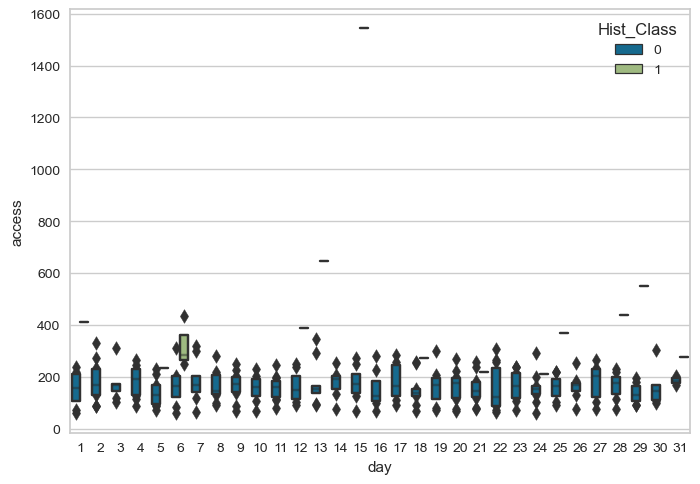

In [21]:
# Data viz per day
sns.boxenplot(data=hist_results, y='access', x='day', hue='Hist_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

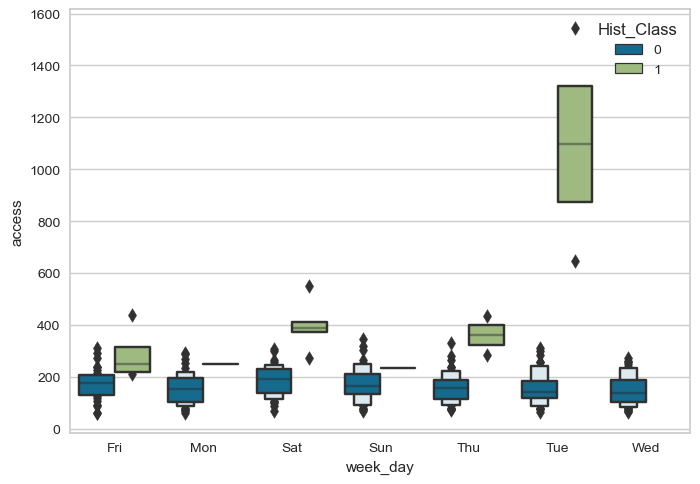

In [22]:
# Data viz per week day
sns.boxenplot(data=hist_results, y='access', x='week_day', hue='Hist_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

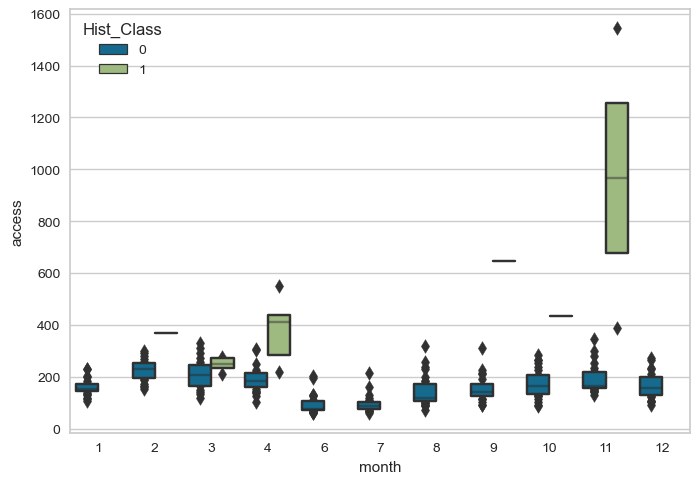

In [23]:
# Data Viz per month
sns.boxenplot(data=hist_results, y='access', x='month', hue='Hist_Class')

In [24]:
# plot_model(hist, plot = 'tsne', feature = 'day')

### **<font color='orangered'>Isolation Forest</font>**

In [25]:
## Creating & assigning the model
iforest = create_model('iforest', fraction=0.05, n_estimators = 800)
iforest_results=assign_model(iforest)
anomalies_iforest_access = iforest_results.sort_values(["access"], ascending = (False))
anomalies_iforest_access.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,date,access,day,month,year,week_day,Anomaly,Anomaly_Score
9,15/11/2022,1543,15,11,2022,Tue,1,0.003267
127,13/09/2022,648,13,9,2022,Tue,0,-0.005502
25,29/04/2023,550,29,4,2023,Sat,0,-0.001995
69,28/04/2023,437,28,4,2023,Fri,1,0.001537
102,06/10/2022,436,6,10,2022,Thu,0,-0.002922


In [26]:
iforest_results.rename(columns = {"Anomaly" : "iforest_Class", "Anomaly_Score" : "iforest_Score"}, inplace = True)
iforest_results.head()

,date,access,day,month,year,week_day,iforest_Class,iforest_Score
0,24/12/2022,200,24,12,2022,Sat,0,-0.005414
1,30/08/2022,100,30,8,2022,Tue,0,-0.003060
2,11/01/2023,115,11,1,2023,Wed,0,-0.003126
3,06/06/2022,61,6,6,2022,Mon,0,-0.005693
4,12/03/2023,248,12,3,2023,Sun,0,-0.004415


In [27]:

anomalies_iforest_score = iforest_results.sort_values(["iforest_Score"], ascending = (False))
anomalies_iforest_score.head()

,date,access,day,month,year,week_day,iforest_Class,iforest_Score
9,15/11/2022,1543,15,11,2022,Tue,1,0.003267
38,12/11/2022,388,12,11,2022,Sat,1,0.003252
111,12/04/2023,140,12,4,2023,Wed,1,0.002502
210,31/01/2023,167,31,1,2023,Tue,1,0.001539
69,28/04/2023,437,28,4,2023,Fri,1,0.001537


In [28]:
# Quantity of outliers
iforest_results['iforest_Class'].value_counts()

0    269
1     15
Name: iforest_Class, dtype: int64

In [29]:
iforest_results[iforest_results['iforest_Class'] == 1].shape

(15, 8)

In [30]:
iforest_outliers = iforest_results[iforest_results['iforest_Class'] == 1]
iforest_outliers_date = iforest_outliers.sort_values(["access"], ascending = (False))
iforest_outliers_date.head(15)

,date,access,day,month,year,week_day,iforest_Class,iforest_Score
9,15/11/2022,1543,15,11,2022,Tue,1,0.003267
69,28/04/2023,437,28,4,2023,Fri,1,0.001537
38,12/11/2022,388,12,11,2022,Sat,1,0.003252
226,02/03/2023,330,2,3,2023,Thu,1,0.000060
230,07/02/2023,299,7,2,2023,Tue,1,0.000009
199,21/04/2023,220,21,4,2023,Fri,1,0.001000
74,06/01/2023,202,6,1,2023,Fri,1,0.000008
86,20/01/2023,199,20,1,2023,Fri,1,0.000957
236,03/02/2023,173,3,2,2023,Fri,1,0.000518
210,31/01/2023,167,31,1,2023,Tue,1,0.001539


In [31]:
# Crosstab results
x = pd.crosstab(iforest_results["iforest_Class"], iforest_results["day"])
x

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
iforest_Class,,,,,,,,,,,,,,,,,,,,,
0,9,9,7,10,10,10,8,10,10,7,...,10,10,11,9,8,7,7,10,8,2
1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


<AxesSubplot:xlabel='day', ylabel='access'>

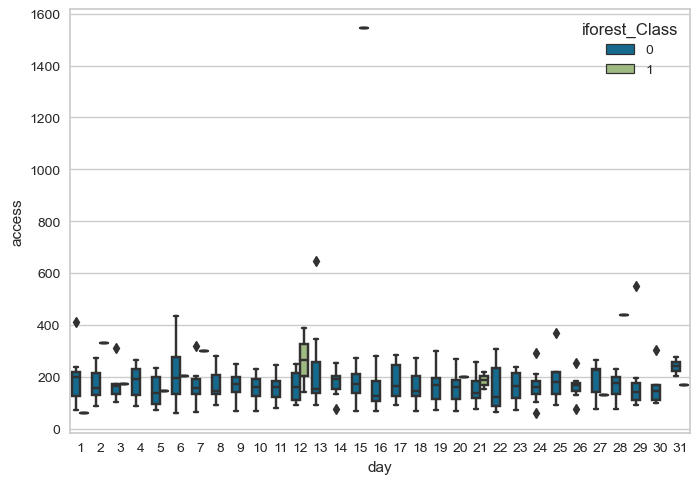

In [32]:
# Data viz
sns.boxplot(data=iforest_results, y='access', x='day', hue='iforest_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

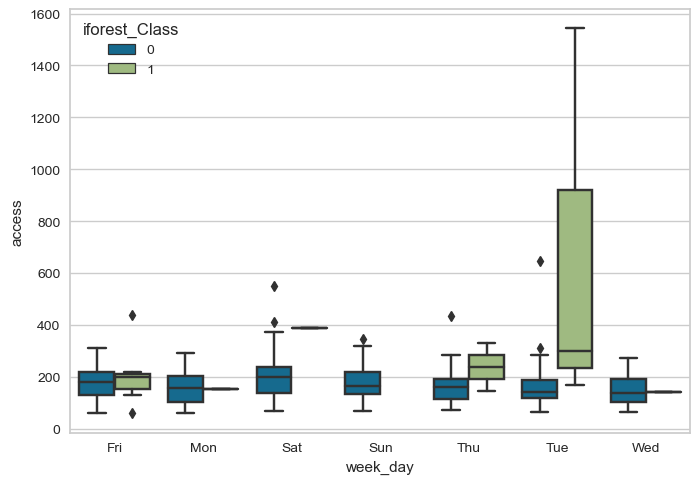

In [33]:
sns.boxplot(data=iforest_results, y='access', x='week_day', hue='iforest_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

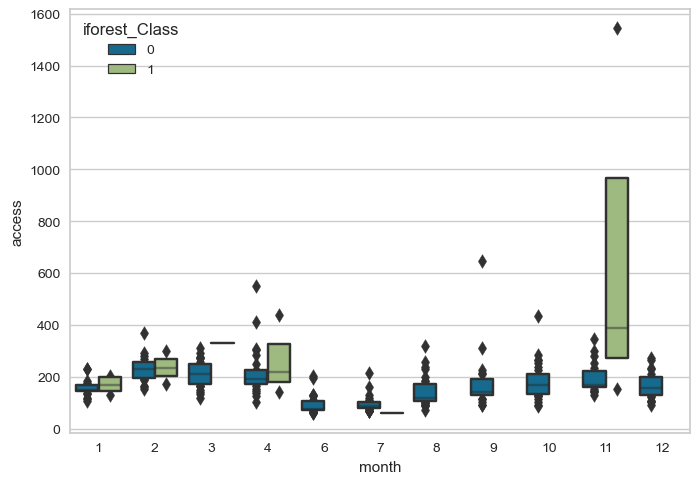

In [34]:
sns.boxenplot(data=iforest_results, y='access', x='month', hue='iforest_Class')

In [35]:
# plot_model(iforest, plot = 'tsne'  , feature = 'day')

### **<font color='orangered'>K Nearest Neighbours (K-NN)</font>**

In [36]:
## Creating & assigning the model
knn = create_model('knn', fraction = 0.05, n_neighbors = 10, radius=2.0)
knn_results = assign_model(knn)
anomalies_knn_access = knn_results.sort_values(["access"], ascending = (False))
anomalies_knn_access.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,date,access,day,month,year,week_day,Anomaly,Anomaly_Score
9,15/11/2022,1543,15,11,2022,Tue,1,26.465318
127,13/09/2022,648,13,9,2022,Tue,1,24.313166
25,29/04/2023,550,29,4,2023,Sat,1,24.129691
69,28/04/2023,437,28,4,2023,Fri,1,24.074694
102,06/10/2022,436,6,10,2022,Thu,1,24.029847


In [37]:
knn_results.rename(columns = {"Anomaly" : "KNN_Class", "Anomaly_Score" : "KNN_Score"}, inplace = True)
knn_results.head()

,date,access,day,month,year,week_day,KNN_Class,KNN_Score
0,24/12/2022,200,24,12,2022,Sat,0,23.916608
1,30/08/2022,100,30,8,2022,Tue,0,23.960214
2,11/01/2023,115,11,1,2023,Wed,0,23.926773
3,06/06/2022,61,6,6,2022,Mon,0,23.926477
4,12/03/2023,248,12,3,2023,Sun,0,23.911615


In [38]:
knn_anomalies = knn_results.sort_values(["KNN_Score", "date"], ascending = (False, False))
knn_anomalies.head()

,date,access,day,month,year,week_day,KNN_Class,KNN_Score
9,15/11/2022,1543,15,11,2022,Tue,1,26.465318
127,13/09/2022,648,13,9,2022,Tue,1,24.313166
25,29/04/2023,550,29,4,2023,Sat,1,24.129691
69,28/04/2023,437,28,4,2023,Fri,1,24.074694
102,06/10/2022,436,6,10,2022,Thu,1,24.029847


In [39]:
# Quantity of outliers
knn_results['KNN_Class'].value_counts()

0    269
1     15
Name: KNN_Class, dtype: int64

In [40]:
knn_anomalies = knn_results[knn_results['KNN_Class'] == 1]
knn_anomalies.shape

(15, 8)

In [41]:
knn_outliers = knn_results[knn_results['KNN_Class'] == 1]
knn_outliers_date = knn_outliers.sort_values(["access"], ascending = (False))
knn_outliers_date.head(15)

,date,access,day,month,year,week_day,KNN_Class,KNN_Score
9,15/11/2022,1543,15,11,2022,Tue,1,26.465318
127,13/09/2022,648,13,9,2022,Tue,1,24.313166
25,29/04/2023,550,29,4,2023,Sat,1,24.129691
69,28/04/2023,437,28,4,2023,Fri,1,24.074694
102,06/10/2022,436,6,10,2022,Thu,1,24.029847
44,01/04/2023,411,1,4,2023,Sat,1,24.012724
226,02/03/2023,330,2,3,2023,Thu,1,24.002354
244,03/03/2023,310,3,3,2023,Fri,1,24.011729
219,30/04/2023,303,30,4,2023,Sun,1,24.000326
237,31/03/2023,276,31,3,2023,Fri,1,24.024547


In [42]:
# Crosstab results
x = pd.crosstab(knn_results["KNN_Class"], knn_results["day"])
x

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
KNN_Class,,,,,,,,,,,,,,,,,,,,,
0,9,9,6,10,11,10,9,10,10,7,...,10,10,11,9,8,7,6,9,6,1
1,1,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2,1,2,2


<AxesSubplot:xlabel='day', ylabel='access'>

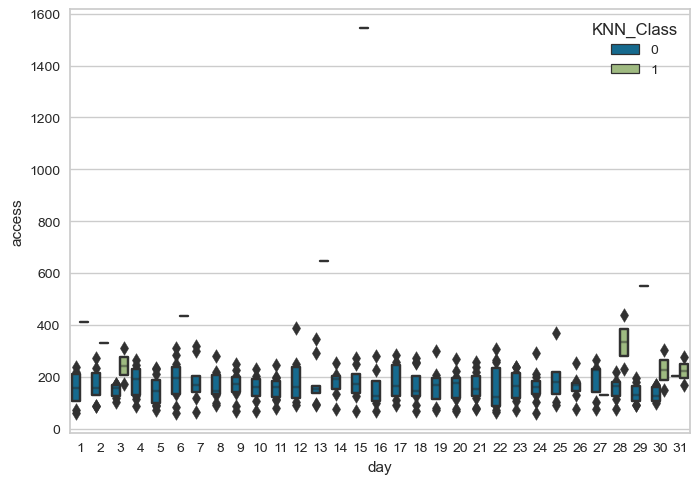

In [43]:
# Data viz
sns.boxenplot(data=knn_results, y='access', x='day', hue='KNN_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

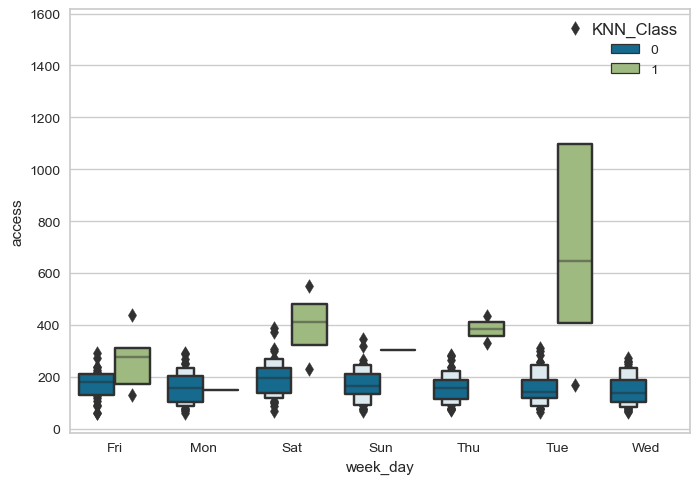

In [44]:
sns.boxenplot(data=knn_results, y='access', x='week_day', hue='KNN_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

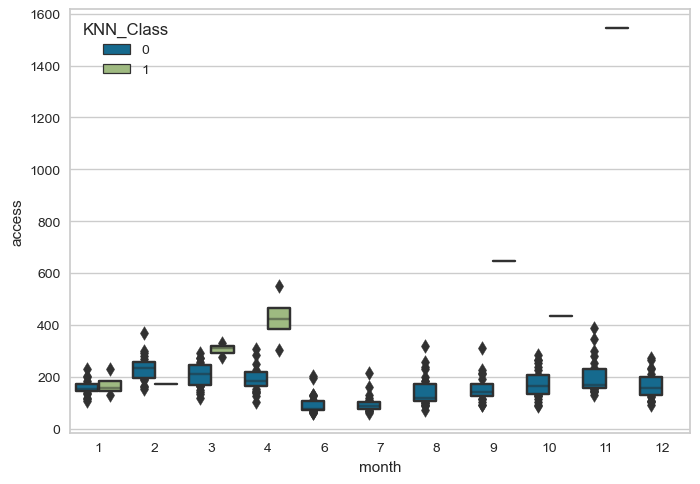

In [45]:
sns.boxenplot(data=knn_results, y='access', x='month', hue='KNN_Class')

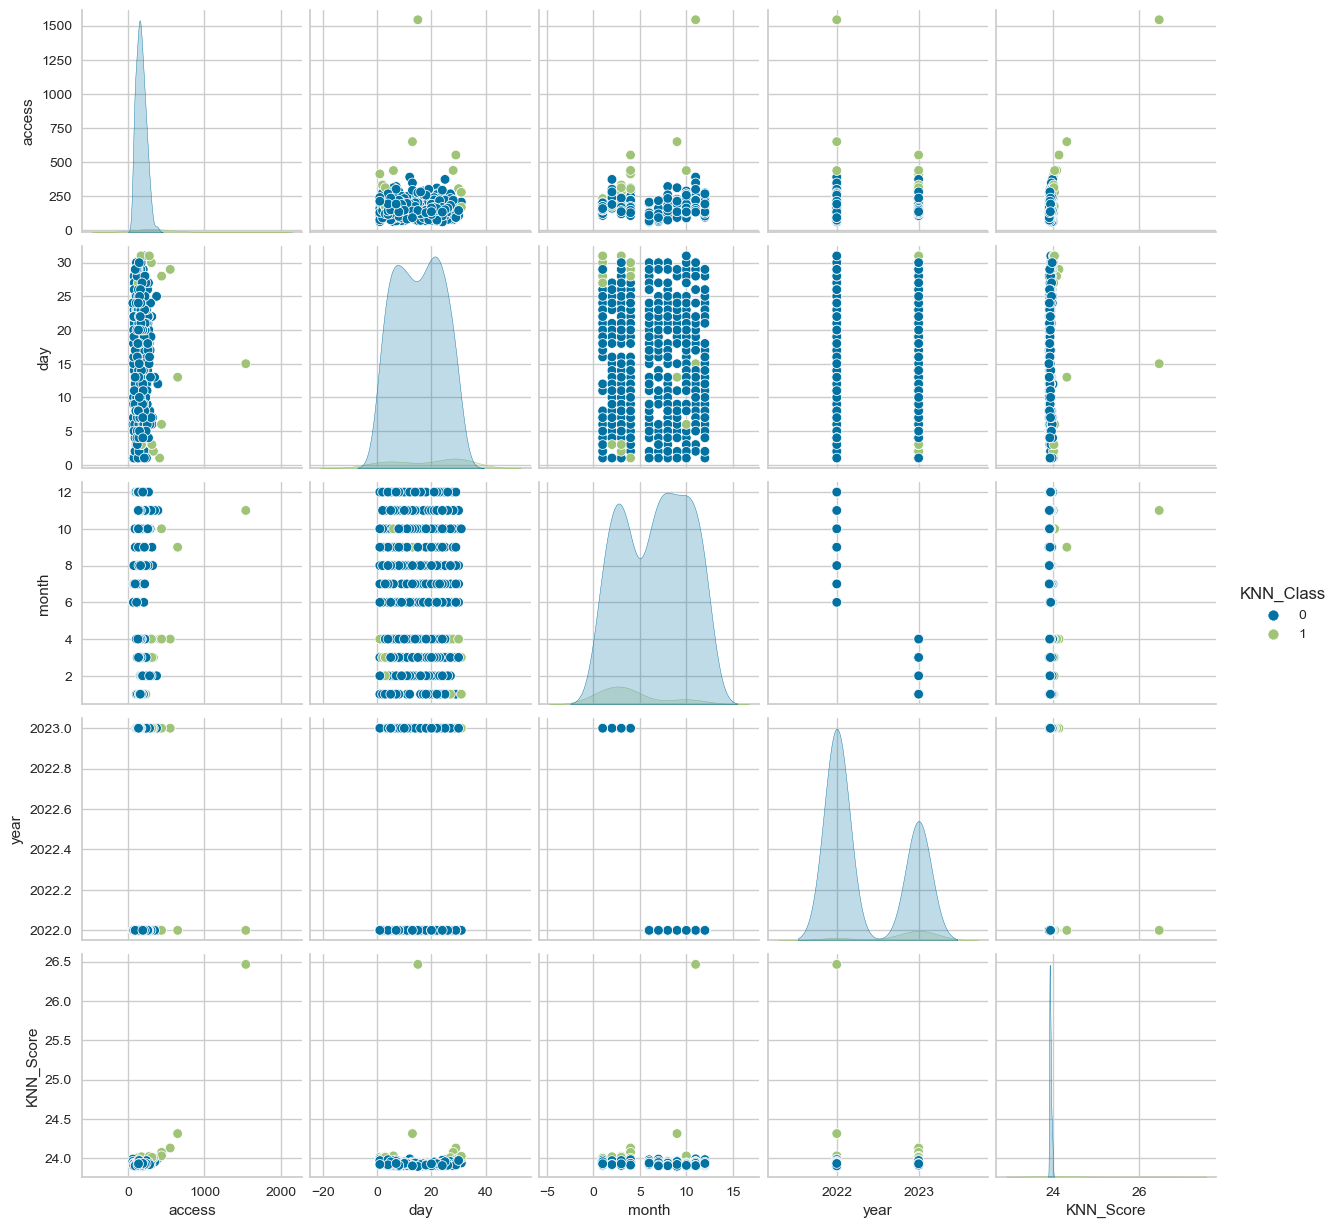

In [46]:
sns.pairplot(data=knn_results, hue='KNN_Class')

In [47]:
# plot_model(knn, plot = 'tsne'  , feature = 'day')

### **<font color='orangered'>Local Outlier Factor (LOF)</font>**

In [48]:
## Creating & assigning the model
lof = create_model('lof', leaf_size=20)
lof_results=assign_model(lof)
anomalies_lof_access = lof_results.sort_values(["access"], ascending = (False))
anomalies_lof_access.head()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,date,access,day,month,year,week_day,Anomaly,Anomaly_Score
9,15/11/2022,1543,15,11,2022,Tue,1,1.098845
127,13/09/2022,648,13,9,2022,Tue,1,1.010826
25,29/04/2023,550,29,4,2023,Sat,1,1.004426
69,28/04/2023,437,28,4,2023,Fri,1,1.001731
102,06/10/2022,436,6,10,2022,Thu,1,1.002975


In [49]:
lof_results.rename(columns = {"Anomaly" : "LOF_Class", "Anomaly_Score" : "LOF_Score"}, inplace = True)
lof_results.head()

,date,access,day,month,year,week_day,LOF_Class,LOF_Score
0,24/12/2022,200,24,12,2022,Sat,0,0.999930
1,30/08/2022,100,30,8,2022,Tue,0,0.999753
2,11/01/2023,115,11,1,2023,Wed,0,1.000658
3,06/06/2022,61,6,6,2022,Mon,0,0.999935
4,12/03/2023,248,12,3,2023,Sun,0,1.000552


In [50]:
lof_anomalies_score = lof_results.sort_values(["LOF_Score"], ascending = (False))
lof_anomalies_score.head()

,date,access,day,month,year,week_day,LOF_Class,LOF_Score
9,15/11/2022,1543,15,11,2022,Tue,1,1.098845
127,13/09/2022,648,13,9,2022,Tue,1,1.010826
25,29/04/2023,550,29,4,2023,Sat,1,1.004426
102,06/10/2022,436,6,10,2022,Thu,1,1.002975
69,28/04/2023,437,28,4,2023,Fri,1,1.001731


In [51]:
lof_anomalies_score2 = lof_results.sort_values(["LOF_Score", "day"], ascending = (False, False))
lof_anomalies_score2.head()

,date,access,day,month,year,week_day,LOF_Class,LOF_Score
9,15/11/2022,1543,15,11,2022,Tue,1,1.098845
127,13/09/2022,648,13,9,2022,Tue,1,1.010826
25,29/04/2023,550,29,4,2023,Sat,1,1.004426
102,06/10/2022,436,6,10,2022,Thu,1,1.002975
69,28/04/2023,437,28,4,2023,Fri,1,1.001731


In [52]:
lof_anomalies_score3 = lof_results.sort_values(["LOF_Score", "day", "month"], ascending = (False, False, False))
lof_anomalies_score3.head()

,date,access,day,month,year,week_day,LOF_Class,LOF_Score
9,15/11/2022,1543,15,11,2022,Tue,1,1.098845
127,13/09/2022,648,13,9,2022,Tue,1,1.010826
25,29/04/2023,550,29,4,2023,Sat,1,1.004426
102,06/10/2022,436,6,10,2022,Thu,1,1.002975
69,28/04/2023,437,28,4,2023,Fri,1,1.001731


In [53]:
# Quantity of outliers
lof_results['LOF_Class'].value_counts()

0    269
1     15
Name: LOF_Class, dtype: int64

In [54]:
anomalies_lof = lof_results[lof_results['LOF_Class'] == 1]
anomalies_lof.shape

(15, 8)

In [55]:
lof_outliers = lof_results[lof_results['LOF_Class'] == 1]
lof_outliers_date = lof_outliers.sort_values(["access"], ascending = (False))
lof_outliers_date.head(15)

,date,access,day,month,year,week_day,LOF_Class,LOF_Score
9,15/11/2022,1543,15,11,2022,Tue,1,1.098845
127,13/09/2022,648,13,9,2022,Tue,1,1.010826
25,29/04/2023,550,29,4,2023,Sat,1,1.004426
69,28/04/2023,437,28,4,2023,Fri,1,1.001731
102,06/10/2022,436,6,10,2022,Thu,1,1.002975
44,01/04/2023,411,1,4,2023,Sat,1,1.001634
95,25/02/2023,371,25,2,2023,Sat,1,1.001220
226,02/03/2023,330,2,3,2023,Thu,1,1.001216
174,13/03/2023,291,13,3,2023,Mon,1,1.001078
263,16/02/2023,279,16,2,2023,Thu,1,1.001160


In [56]:
# Crosstab results
x = pd.crosstab(lof_results["LOF_Class"], lof_results["day"])
x

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
LOF_Class,,,,,,,,,,,,,,,,,,,,,
0,8,8,8,10,11,10,9,10,10,7,...,10,10,11,8,8,8,7,9,6,3
1,2,2,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,2,0


<AxesSubplot:xlabel='day', ylabel='access'>

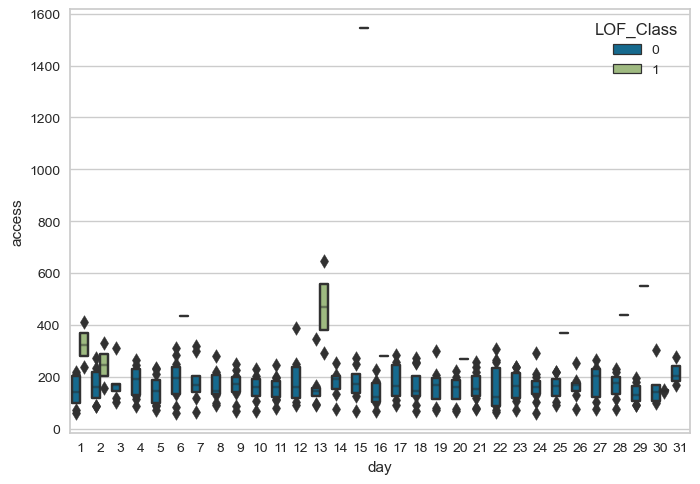

In [57]:
# Data viz
sns.boxenplot(data=lof_results, y='access', x='day', hue='LOF_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

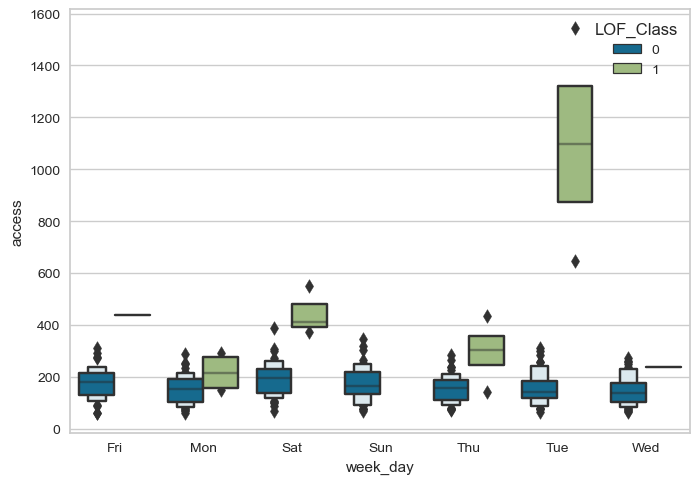

In [58]:
sns.boxenplot(data=lof_results, y='access', x='week_day', hue='LOF_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

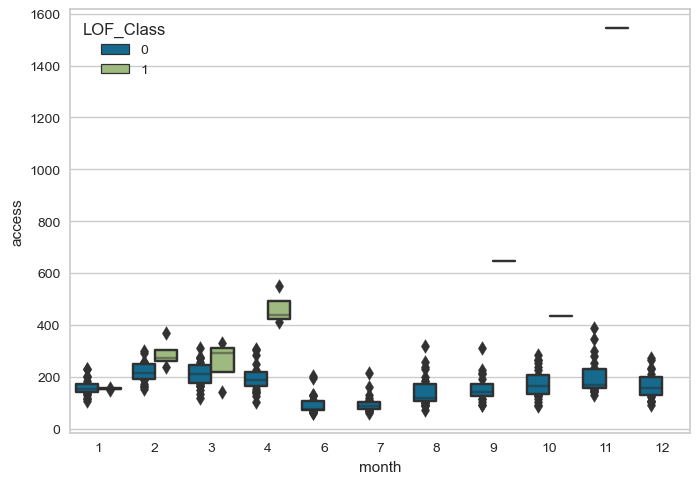

In [59]:
sns.boxenplot(data=lof_results, y='access', x='month', hue='LOF_Class')

In [60]:
# plot_model(lof, plot = 'tsne', feature = 'day')

## **<font color='orange'>Part 3 - Predictions</font>**

In [61]:
test.shape

(50, 6)

In [62]:
test_sorted = test.sort_values(["access", "day", "month"],ascending = (False, False, False))
test_sorted.head()

,date,access,day,month,year,week_day
46,22/02/2023,401,22,2,2023,Wed
41,13/01/2023,301,13,1,2023,Fri
26,26/10/2022,296,26,10,2022,Wed
14,31/08/2022,260,31,8,2022,Wed
31,25/11/2022,259,25,11,2022,Fri


In [63]:
# Predictions with Histogram
test_predictions_hist = predict_model(hist, data=test)
test_predictions_hist = test_predictions_hist.sort_values(["Anomaly_Score"], ascending = (False))
test_predictions_hist.head()

,date_24/12/2022,date_30/08/2022,date_11/01/2023,date_06/06/2022,date_12/03/2023,date_30/06/2022,date_11/06/2022,date_28/06/2022,date_24/03/2023,date_15/11/2022,...,year,week_day_Sat,week_day_Tue,week_day_Wed,week_day_Mon,week_day_Sun,week_day_Thu,week_day_Fri,Anomaly,Anomaly_Score
48,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,146.884535
46,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,2.400397,-0.410761,-0.422402,-0.433918,-0.368782,0,146.796353
45,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,146.284285
41,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,145.878985
47,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,2.544344,-0.416598,-0.410761,-0.422402,-0.433918,-0.368782,0,145.818490


In [64]:
# Quantity of outliers
test_predictions_hist['Anomaly'].value_counts()

0    50
Name: Anomaly, dtype: int64

In [65]:
# Prediction with Isolation Forest
test_predictions_iforest = predict_model(iforest, data=test)
test_predictions_iforest = test_predictions_iforest.sort_values(["Anomaly_Score"], ascending = (False))
test_predictions_iforest.head()

,date_24/12/2022,date_30/08/2022,date_11/01/2023,date_06/06/2022,date_12/03/2023,date_30/06/2022,date_11/06/2022,date_28/06/2022,date_24/03/2023,date_15/11/2022,...,year,week_day_Sat,week_day_Tue,week_day_Wed,week_day_Mon,week_day_Sun,week_day_Thu,week_day_Fri,Anomaly,Anomaly_Score
41,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,-0.009683
37,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,-0.789213,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,-0.010184
45,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,-0.010221
39,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,2.434508,-0.422402,-0.433918,-0.368782,0,-0.010382
48,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,-0.010539


In [66]:
# Quantity of outliers
test_predictions_iforest['Anomaly'].value_counts()

0    50
Name: Anomaly, dtype: int64

In [67]:
# Predictions with KNN
test_predictions_knn = predict_model(knn, data=test)
test_predictions_knn = test_predictions_knn.sort_values(["Anomaly_Score"], ascending = (False))
test_predictions_knn.head()

,date_24/12/2022,date_30/08/2022,date_11/01/2023,date_06/06/2022,date_12/03/2023,date_30/06/2022,date_11/06/2022,date_28/06/2022,date_24/03/2023,date_15/11/2022,...,year,week_day_Sat,week_day_Tue,week_day_Wed,week_day_Mon,week_day_Sun,week_day_Thu,week_day_Fri,Anomaly,Anomaly_Score
46,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,2.400397,-0.410761,-0.422402,-0.433918,-0.368782,0,17.076807
26,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,-0.789213,-0.410761,-0.393029,2.400397,-0.410761,-0.422402,-0.433918,-0.368782,0,17.007718
14,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,-0.789213,-0.410761,-0.393029,2.400397,-0.410761,-0.422402,-0.433918,-0.368782,0,16.996343
44,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,2.304585,-0.368782,0,16.996118
37,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,-0.789213,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,-0.433918,2.711631,0,16.988462


In [68]:
# Quantity of outliers
test_predictions_knn['Anomaly'].value_counts()

0    50
Name: Anomaly, dtype: int64

In [69]:
# Predicting with LOF
test_predictions_lof = predict_model(lof, data=test)
test_predictions_lof = test_predictions_lof.sort_values(["Anomaly_Score", "access"], ascending = (False, False))
test_predictions_lof.head()

,date_24/12/2022,date_30/08/2022,date_11/01/2023,date_06/06/2022,date_12/03/2023,date_30/06/2022,date_11/06/2022,date_28/06/2022,date_24/03/2023,date_15/11/2022,...,year,week_day_Sat,week_day_Tue,week_day_Wed,week_day_Mon,week_day_Sun,week_day_Thu,week_day_Fri,Anomaly,Anomaly_Score
44,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,-0.422402,2.304585,-0.368782,0,1.000257
47,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,2.544344,-0.416598,-0.410761,-0.422402,-0.433918,-0.368782,0,1.000140
39,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,2.434508,-0.422402,-0.433918,-0.368782,0,1.000137
46,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,2.400397,-0.410761,-0.422402,-0.433918,-0.368782,0,1.000102
43,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,-0.059444,...,1.267085,-0.410761,-0.393029,-0.416598,-0.410761,2.367414,-0.433918,-0.368782,0,1.000057


In [70]:
# Quantity of outliers
test_predictions_lof['Anomaly'].value_counts()

0    50
Name: Anomaly, dtype: int64